In the diverse landscape of Austin's neighborhoods, how do listing prices, estimated revenues, and the sheer number of listings vary, in order to determine the best options for investing? Identifying neighborhoods with the highest revenue potential, understanding the distribution of listings, and gauging the feedback of guests can provide valuable insights for hosts to optimize offerings and for auxiliary businesses to target their services.

In [6]:
import pandas as pd

data = pd.read_csv('listings_3_updated_neighborhoods.csv')

data['price'] = data['price'].str.replace("$", "", regex=False).str.replace(",", "", regex=False).astype(float)

data['estimated_revenue'] = (365 - data['availability_365']) * data['price']


Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]
filtered_data = filtered_data[filtered_data['room_type'] != 'Hotel room']
luxury_threshold = filtered_data['price'].quantile(0.95)
filtered_data = filtered_data[filtered_data['price'] <= luxury_threshold]

avg_revenue_per_neighborhood = filtered_data.groupby('neighbourhood_cleansed')['estimated_revenue'].mean().sort_values(ascending=False)
top_neighborhoods = avg_revenue_per_neighborhood[avg_revenue_per_neighborhood.index != '78712'].head(10)

print(top_neighborhoods)


neighbourhood_cleansed
78746.0    49802.444444
78739.0    48589.200000
78726.0    42344.714286
78733.0    40205.172414
78701.0    39358.615885
78702.0    39118.597367
78723.0    36991.723270
78704.0    36588.017241
78731.0    36420.652893
78749.0    35540.533835
Name: estimated_revenue, dtype: float64


/var/folders/tz/3pvrgf856w571w4wmjjh8j380000gn/T/ipykernel_904/654293619.py:3: DtypeWarning: Columns (2,61) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('listings_3_updated_neighborhoods.csv')


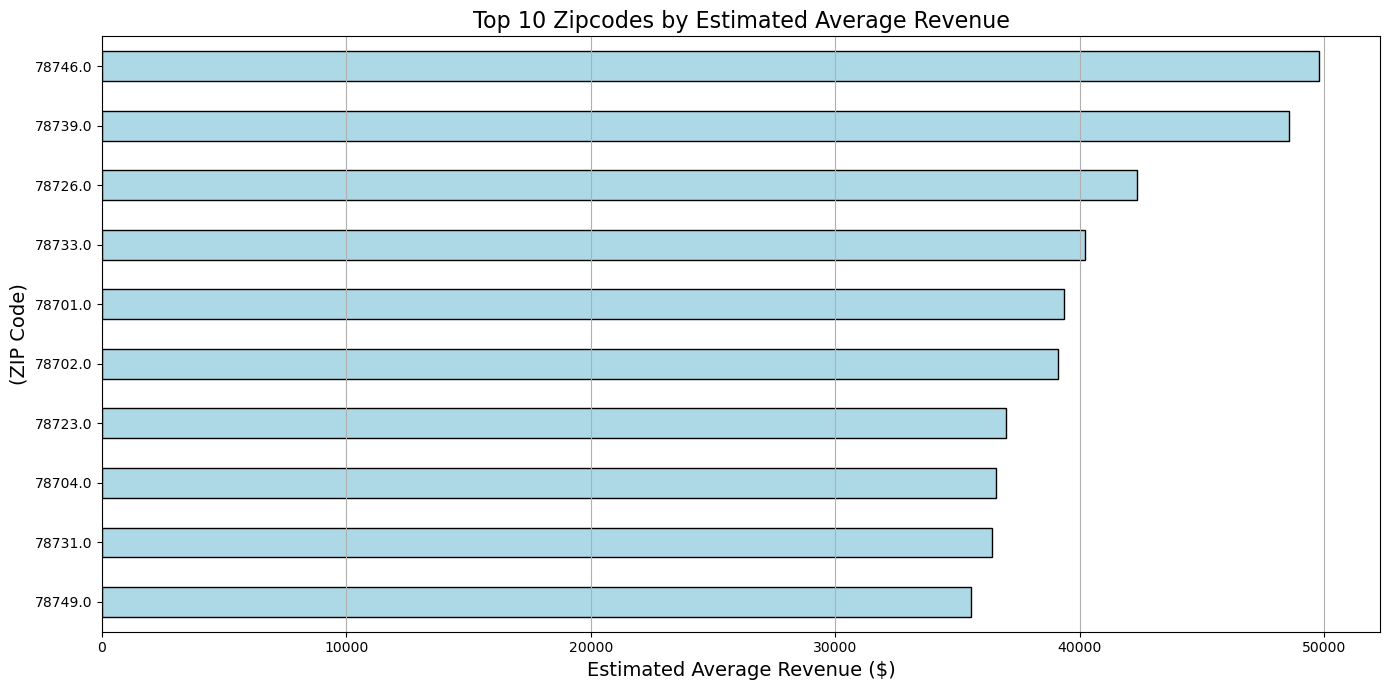

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
top_neighborhoods.sort_values().plot(kind='barh', color='lightblue', edgecolor='black')
plt.xlabel('Estimated Average Revenue ($)', fontsize=14)
plt.ylabel('(ZIP Code)', fontsize=14)
plt.title('Top 10 Zipcodes by Estimated Average Revenue', fontsize=16)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [10]:
# Define the zipcode_to_neighborhood dictionary
zipcode_to_neighborhood = {
    '78701': 'Downtown',
    '78704': 'South Central',
    '78703': 'Central Austin',
    '78705': 'Central Austin',
    '78751': 'Central Austin',
    '78756': 'Central Austin',
    '78757': 'Central Austin',
    '78702': 'East Austin',
    '78722': 'East Austin',
    '78741': 'Southeast',
    '78744': 'Southeast',
    '78747': 'Southeast',
    '78745': 'South Austin',
    '78748': 'South Austin',
    '78735': 'Southwest Austin',
    '78736': 'Southwest Austin',
    '78738': 'Southwest Austin',
    '78739': 'Southwest Austin',
    '78733': 'Westlake Hills',
    '78746': 'Westlake Hills',
    '78731': 'Northwest Austin',
    '78727': 'Northwest Austin',
    '78750': 'Northwest Austin',
    '78759': 'Northwest Austin',
    '78721': 'Northeast Austin',
    '78723': 'Northeast Austin',
    '78724': 'Northeast Austin'
}

updated_data = pd.read_csv('listings_3_updated_neighborhoods.csv', low_memory=False)

updated_data['neighbourhood_cleansed'] = updated_data['neighbourhood_cleansed'].astype(str).str.split('.', expand=True)[0]

updated_data['neighborhood_name'] = updated_data['neighbourhood_cleansed'].map(zipcode_to_neighborhood)

neighborhood_listing_counts_final = updated_data['neighborhood_name'].value_counts()

neighborhood_listing_counts_final






Central Austin      2278
South Central       2274
East Austin         2040
Southeast           1478
Northeast Austin    1114
Downtown             965
South Austin         939
Northwest Austin     612
Westlake Hills       366
Southwest Austin     245
Name: neighborhood_name, dtype: int64

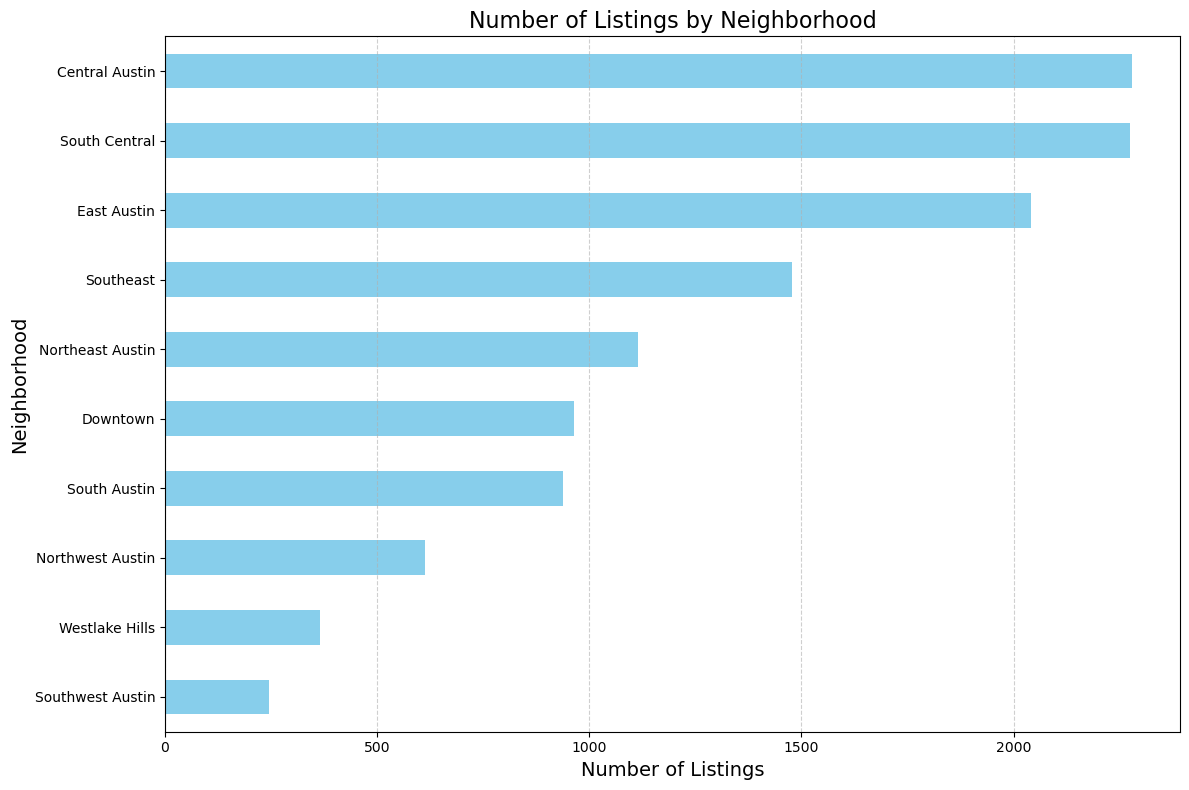

In [12]:
plt.figure(figsize=(12, 8))
neighborhood_listing_counts_final.sort_values().plot(kind='barh', color='skyblue')
plt.title('Number of Listings by Neighborhood', fontsize=16)
plt.xlabel('Number of Listings', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


The heart of Austin's Airbnb market beats strongest in Central Austin, with South Central and East Austin following closely. These areas have the highest number of listings, making them prime locations for potential hosts and businesses.

In [28]:
avg_revenue_by_neighborhood = data.groupby('neighborhood_name')['estimated_revenue'].mean().sort_values(ascending=False)

avg_revenue_by_neighborhood

neighborhood_name
Westlake Hills      117696.207650
Downtown             83779.693264
South Central        62559.507476
Southwest Austin     62363.628571
East Austin          57158.798039
Northwest Austin     51097.348039
Central Austin       47696.559017
Northeast Austin     43558.245063
Southeast            37676.551421
South Austin         37496.236422
Name: estimated_revenue, dtype: float64

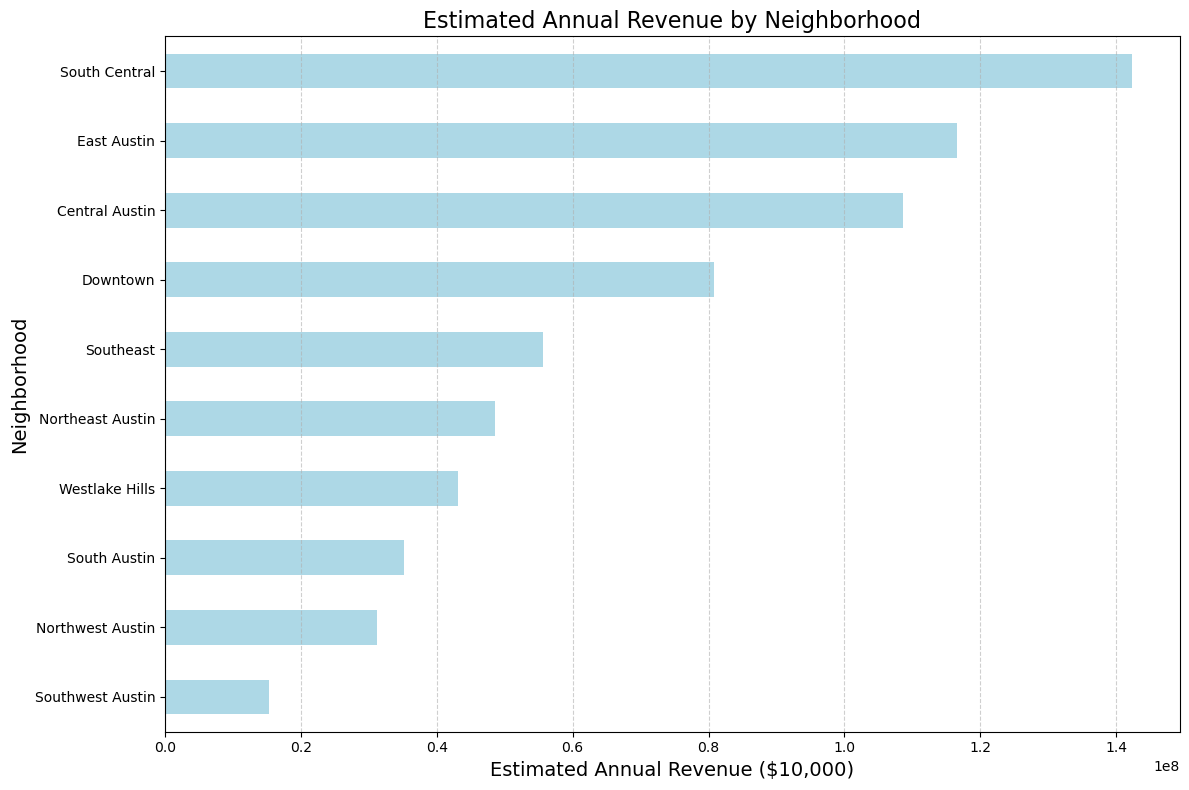

In [17]:
updated_data['availability_365'].fillna(0, inplace=True)

updated_data['estimated_annual_revenue'] = (365 - updated_data['availability_365']) * updated_data['price']

neighborhood_revenue_updated = updated_data.groupby('neighborhood_name')['estimated_annual_revenue'].sum()

plt.figure(figsize=(12, 8))
neighborhood_revenue_updated.sort_values().plot(kind='barh', color='lightblue')
plt.title('Estimated Annual Revenue by Neighborhood', fontsize=16)
plt.xlabel('Estimated Annual Revenue ($10,000)', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [39]:
filtered_data['booking_ratio'] = (365 - filtered_data['availability_365']) / 365

bedroom_booking_ratio = filtered_data.groupby('bedrooms')['booking_ratio'].mean().sort_values(ascending=False)
bedroom_booking_ratio

bedrooms
1.0     0.583211
2.0     0.572694
3.0     0.557153
6.0     0.496027
4.0     0.492369
5.0     0.449369
8.0     0.408219
7.0     0.384110
10.0    0.373516
13.0    0.130137
9.0     0.115068
12.0    0.000000
Name: booking_ratio, dtype: float64

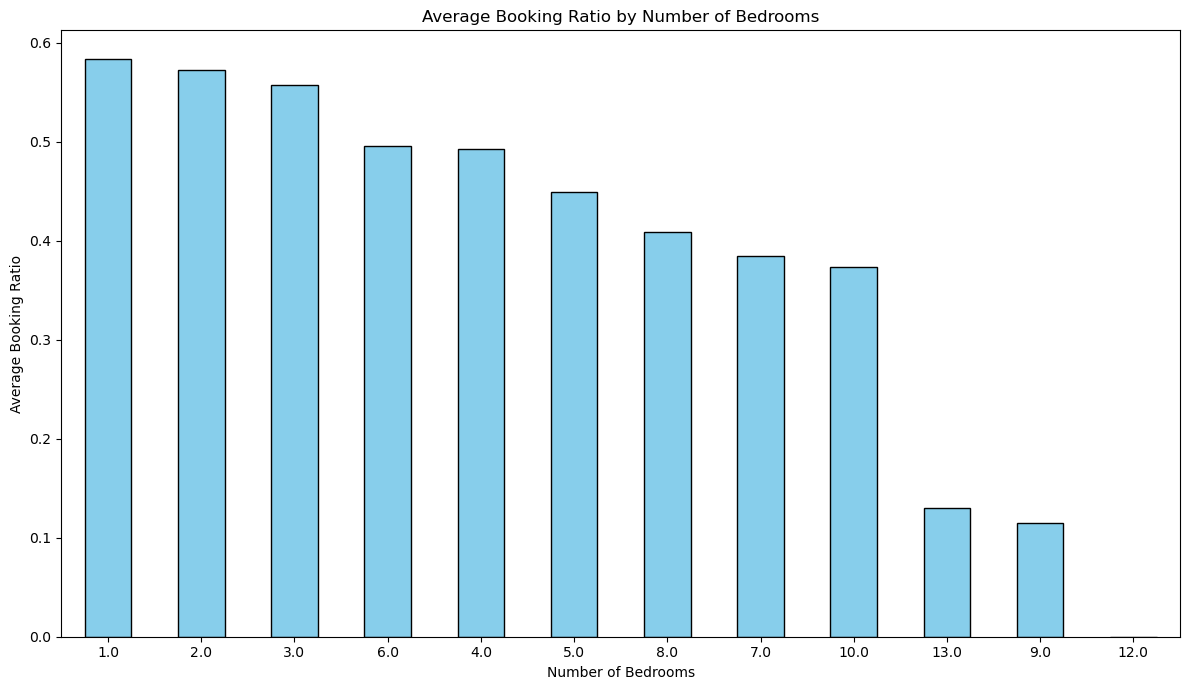

In [52]:
plt.figure(figsize=(12, 7))
bedroom_booking_ratio.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Booking Ratio by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Booking Ratio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Smaller listings, such as those with 1 or 2 bedrooms, are often more appealing to solo travelers, couples, or small families. These groups often make up a significant portion of travelers, especially in urban areas where space is a premium.

In [36]:

average_review_scores = data[data['host_id'].isin(top_hosts_by_reviews.index)].groupby('host_id')['review_scores_rating'].mean()

top_host_reviews_df['Average Review Score'] = average_review_scores

top_host_reviews_df.sort_values(by='Total Number of Reviews', ascending=False)


,Host Name,Total Number of Reviews,Average Review Score
host_id,,,
15782486,Lodgewell,4985,4.814348
4929310,Ryan,4401,4.555000
36075426,Colleen,4131,4.657500
35817561,Jen And Steven,3787,4.878272
88769927,Jason,3670,4.832667
7270902,Meshelle,3609,4.813043
50214619,Ames - Austin Vacay,3291,4.583636
1770424,Jason,3157,4.832500
2934425,Brett,3065,4.884167


In [37]:
average_listing_price = data[data['host_id'].isin(top_hosts_by_reviews.index)].groupby('host_id')['price'].mean()

top_host_reviews_df['Average Listing Price ($)'] = average_listing_price

top_host_reviews_df.sort_values(by='Total Number of Reviews', ascending=False)


,Host Name,Total Number of Reviews,Average Review Score,Average Listing Price ($)
host_id,,,,
15782486,Lodgewell,4985,4.814348,390.021277
4929310,Ryan,4401,4.555000,329.928571
36075426,Colleen,4131,4.657500,93.178571
35817561,Jen And Steven,3787,4.878272,81.382716
88769927,Jason,3670,4.832667,204.875000
7270902,Meshelle,3609,4.813043,151.500000
50214619,Ames - Austin Vacay,3291,4.583636,104.782609
1770424,Jason,3157,4.832500,115.375000
2934425,Brett,3065,4.884167,244.416667


In [49]:

reviews_data = pd.read_csv('reviews_2.csv')

dirty_reviews = reviews_data[reviews_data['comments'].str.contains('dirty', case=False, na=False)]

dirty_counts = dirty_reviews['listing_id'].value_counts()

dirty_hosts = pd.merge(dirty_counts.reset_index(), data[['id', 'host_name', 'host_id']], left_on='index', right_on='id', how='left')

dirty_hosts = dirty_hosts.rename(columns={'listing_id': 'dirty_mentions', 'index': 'listing_id'}).sort_values(by='dirty_mentions', ascending=False)

top_dirty_hosts = dirty_hosts.head(10)
top_dirty_hosts[['host_name', 'host_id', 'listing_id', 'dirty_mentions']]


,host_name,host_id,listing_id,dirty_mentions
0,Kasa,88566861,44334720,17
2,Jillian,4868857,45103482,12
1,Kasa,88566861,44334709,12
3,Jason,88769927,34807046,11
4,Jason,88769927,15886011,11
5,Jillian + Jason,340033303,42980657,10
6,Kristine,18153980,3603024,9
7,Ryan,4929310,4047528,9
8,Alex,24516340,32858558,9
9,Firehouse Hostel,307543433,39913682,9


I am concurrently starting a side business to clean Airbnb's to save on my own cost, and as well generate more revenue. These hosts could potentially benefit from a cleaning service to improve their guest experience and boost their review scores.

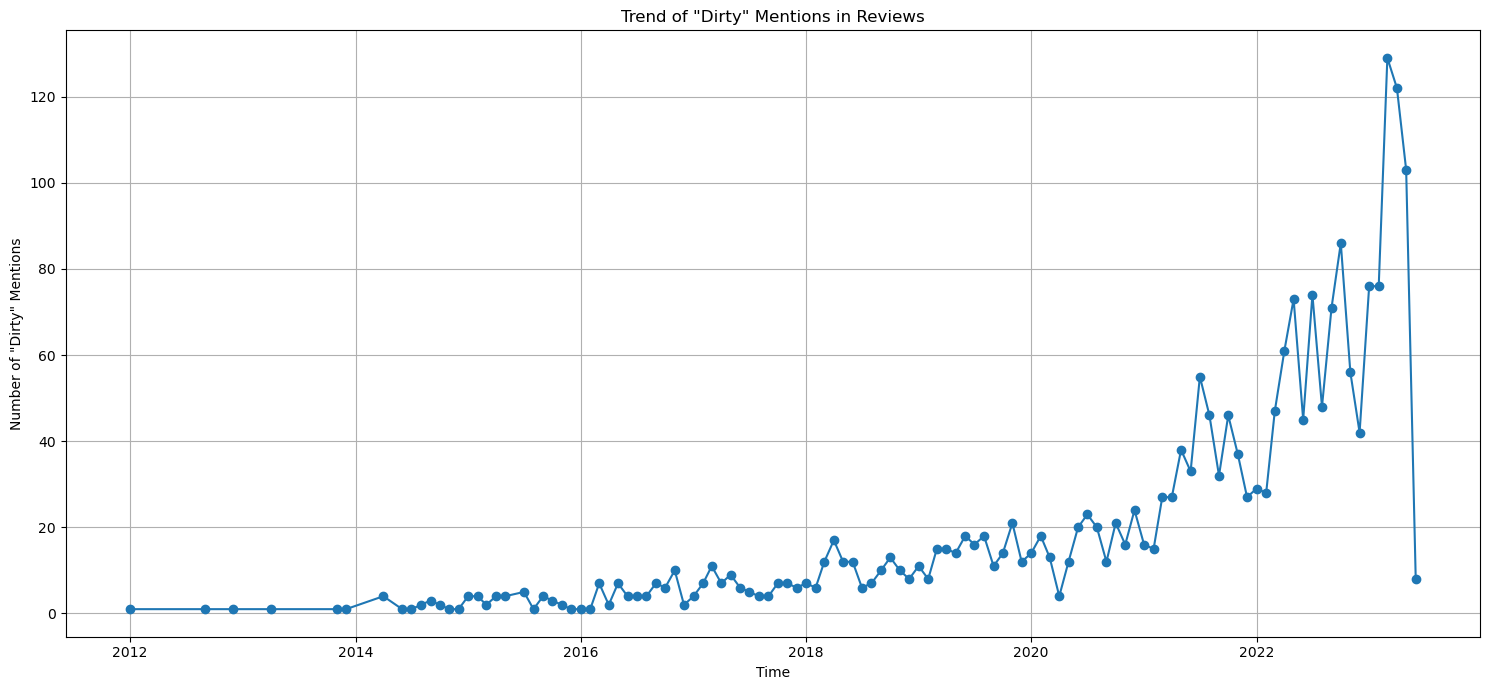

In [56]:
reviews_data_with_date = pd.read_csv('reviews_2.csv')

dirty_reviews = reviews_data_with_date[reviews_data_with_date['comments'].str.contains('dirty', case=False, na=False)].copy()


dirty_reviews['year'] = pd.to_datetime(dirty_reviews['date']).dt.year
dirty_reviews['month'] = pd.to_datetime(dirty_reviews['date']).dt.month

dirty_mentions_trend = dirty_reviews.groupby(['year', 'month']).size().reset_index(name='dirty_mentions_count')

plt.figure(figsize=(15, 7))
plt.plot(pd.to_datetime(dirty_mentions_trend[['year', 'month']].astype(str).agg('-'.join, axis=1)), 
         dirty_mentions_trend['dirty_mentions_count'], marker='o', linestyle='-')
plt.title('Trend of "Dirty" Mentions in Reviews')
plt.xlabel('Time')
plt.ylabel('Number of "Dirty" Mentions')
plt.grid(True)
plt.tight_layout()
plt.show()

Taking a look at "dirty" mentions over time, we can assume as the number of listings and reviews grows over time, its natural to see an increase in the mentions of any specific word, including "dirty". Guests might be more aware and particular about cleanliness in recent times, especially considering our recent global health crisis. Now more than ever seems like advantageous time, to start a new  quality cleaning company.